In [ ]:
## OLS_with_statsmodels_part2
- using kaggle advertising dataset
- aiming to be farmilar with using statsmodel to run simple linear aggression and analysing statistics
- farmilar with techniques u

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
adver = pd.read_csv('data/Advertising.csv', index_col=0)

In [10]:
adver.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
# 5 points statistics for data
adver.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
adver.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

/Users/victor/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


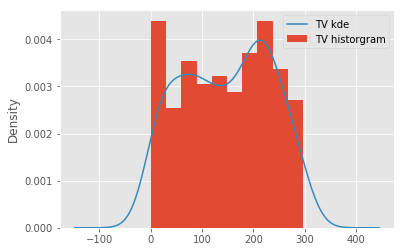

/Users/victor/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


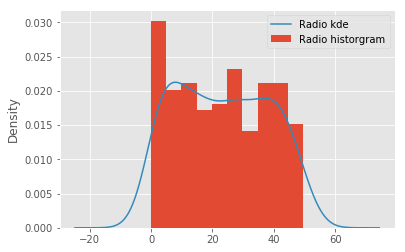

/Users/victor/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


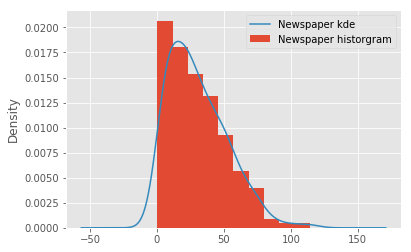

/Users/victor/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


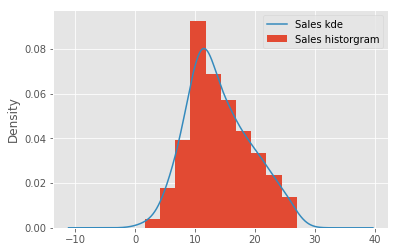

In [13]:
# check distribution  of the predictors
for column in adver.columns:
    adver[column].plot.hist(normed=True, label=column+ ' historgram')
    adver[column].plot.kde(label=column+ ' kde')
    plt.legend()
    plt.show()

### check linearity

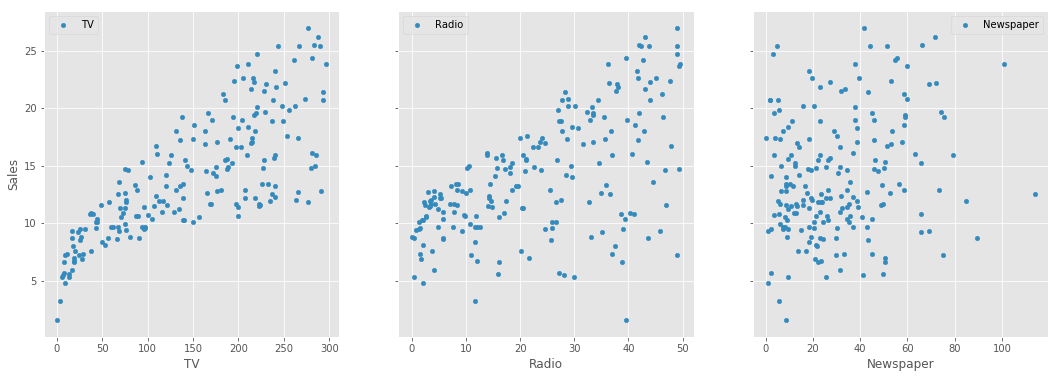

In [17]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(18,6))
for index, channel in enumerate(['TV', 'Radio', 'Newspaper']):
    adver.plot(kind='scatter', x=channel, y='Sales', ax=ax[index], label=channel)
    
    
plt.legend()
plt.show()

In [21]:
# tv shows good linearity, radio also has but has a higher variance than tv, newspaper is the worst, there's not much 
# linearity between newspaper and sales

### simple regression wih statsmodels using TV  as predictor for sales

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

f = 'Sales~TV'
model = smf.ols(formula=f, data=adver).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        21:07:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

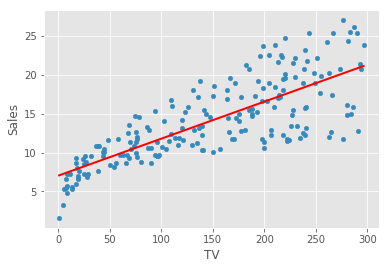

In [26]:
x_new = pd.DataFrame({'TV': [adver.TV.min(), adver.TV.max()]})
x_new_predictions = model.predict(x_new)

adver.plot(kind='scatter', x='TV', y='Sales')
plt.plot(x_new, x_new_predictions, c='red', linewidth=2)
plt.show()

#### visualise errors term for variance and heteroscedasticity

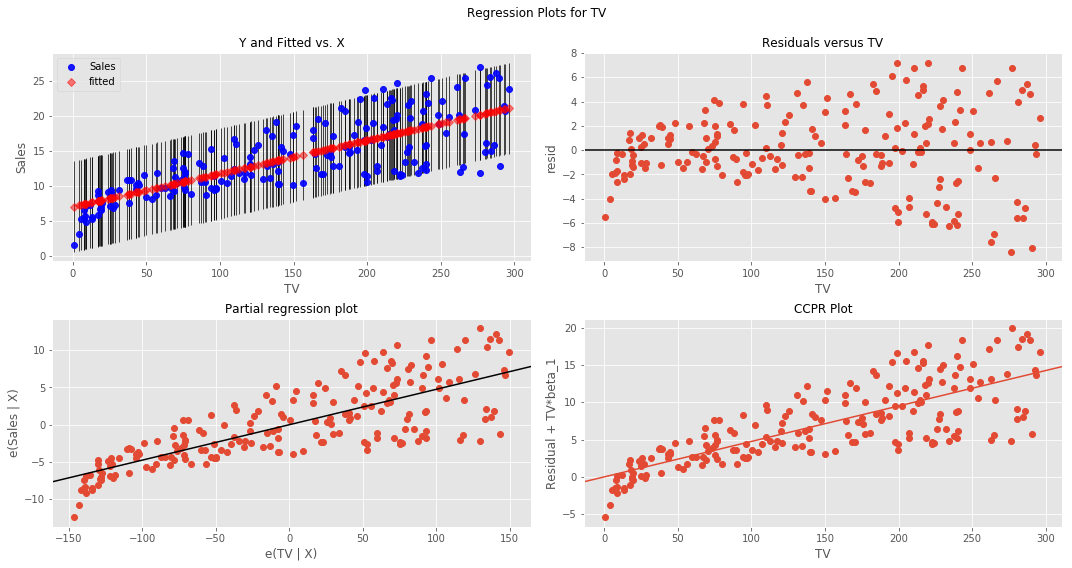

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'TV', fig=fig)
plt.show()

In [33]:
# variances are having a cone shape, sign of heteroscedasticity

#### check normality - qq plot

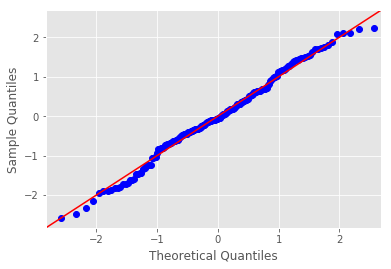

In [32]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [ ]:
# vey much a straight line, normality assumption met

### simple regression wih statsmodels using Radio  as predictor for sales

In [34]:
f = 'Sales~Radio'
model = smf.ols(formula=f, data=adver).fit()

In [36]:
model.rsquared

0.33203245544529547

In [37]:
model.params

Intercept    9.311638
Radio        0.202496
dtype: float64

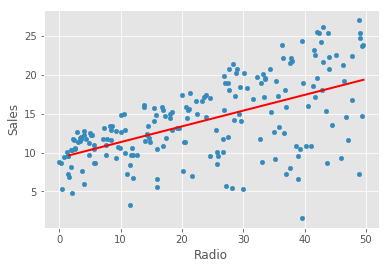

In [38]:
x_new = pd.DataFrame({'Radio': [adver.Sales.min(), adver.Radio.max()]})
pred = model.predict(x_new)
adver.plot(kind='scatter', x='Radio', y='Sales')
plt.plot(x_new, pred, c='red', linewidth=2)
plt.show()

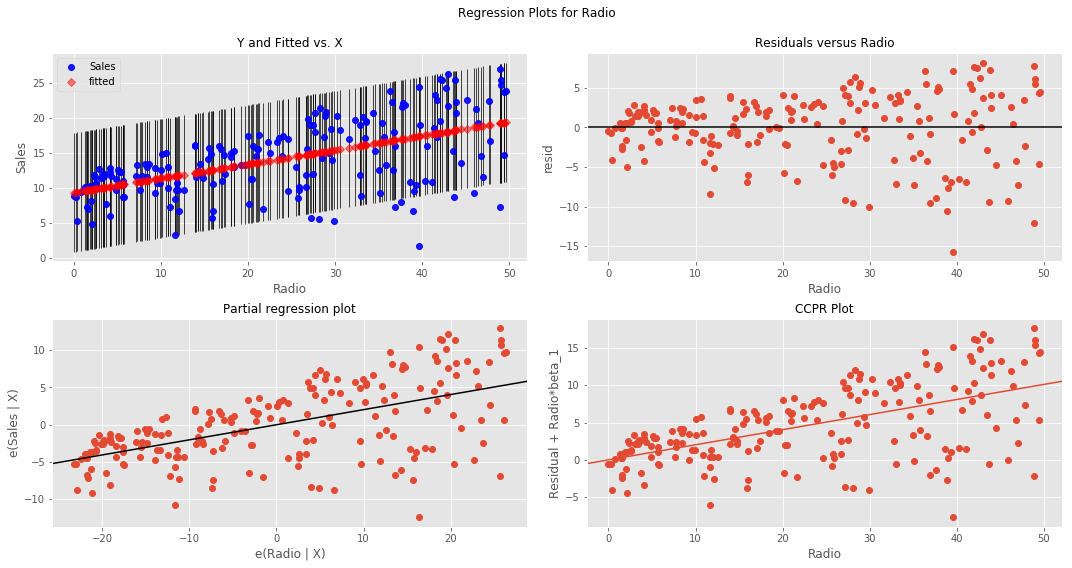

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Radio', fig=fig)
plt.show()

In [ ]:
# cone shape residuals/variance - worse than TV

/Users/victor/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


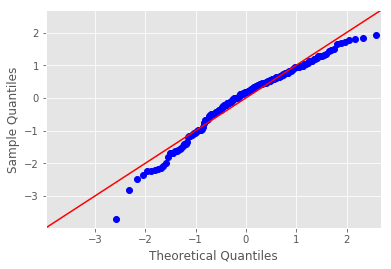

In [39]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
# off the line, normality assumption not met

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           4.35e-19
Time:                        21:44:25   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions

In [ ]:
none of these two predictors, TV or Radio, could work as good predictors for sales